In [1]:
import numpy as np

import  matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd

import scipy
from scipy import stats

import xarray as xa

In [2]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [3]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [4]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [52]:
#Gistemp Surface temp by lat, lon and time
#st_global_anom_raghu = xa.open_dataset("../daa/gistemp1200_GHCNv4_ERSSTv5.nc").sel(time=ragutime).tempanomaly
#gmst_anom_raghu = st_global_anom_raghu.mean(["lat", "lon"])
#gmst_anom_raghu 

In [9]:
#0
trop = slice(-30,30)
ragutime = slice('2006-06-15T00:00:00.000000000','2020-12-15T00:00:00.000000000' )

In [10]:
RclrLW_trop = alllw.sel(lat=trop,).toa_lw_clr_mon.mean("lon")
RovcLW_trop = alllw.sel(lat=trop,).toa_lw_cldtyp_mon.mean("lon")
lwK_trop = (RclrLW_trop - RovcLW_trop)/100

In [11]:
RclrSW_trop = allsw.sel(lat=trop,).toa_sw_clr_mon.mean("lon")
RovcSW_trop = allsw.sel(lat=trop,).toa_sw_cldtyp_mon.mean("lon")
swK_trop = (RclrSW_trop - RovcSW_trop)/100

In [12]:
#1d
K_trop = lwK_trop + swK_trop
K_trop

<xarray.DataArray (time: 245, lat: 60, opt: 6, press: 7)>
array([[[[-6.95322827e-02,  3.64839882e-02,  8.21122974e-02, ...,
           2.25793272e-01,  2.04872966e-01,  7.49827921e-02],
         [-1.62981927e-01, -6.67938590e-02,  3.76801491e-02, ...,
           3.13377500e-01,  4.12711978e-01,  3.57284546e-01],
         [-3.40756178e-01, -2.39068091e-01, -9.13528800e-02, ...,
           2.37454534e-01,  4.44557786e-01,             nan],
         [-5.62052011e-01, -4.30202931e-01, -2.85203397e-01, ...,
           5.42105436e-02,  2.92046666e-01,             nan],
         [-7.38983631e-01, -5.92498481e-01, -4.67242599e-01, ...,
          -9.60992575e-02,  1.48593426e-01,             nan],
         [-8.96904230e-01, -7.89884746e-01, -6.86066270e-01, ...,
          -2.32035637e-01,  6.15028143e-02,  3.62516999e-01]],

        [[-6.88544065e-02,  4.08401489e-02,  8.98803324e-02, ...,
           2.18167841e-01,  2.13180110e-01,  5.63667268e-02],
         [-1.70478523e-01, -6.60903454e-02,  3.68929505e-02, ...,
           3.18872720e-01,  4.23389077e-01,  1.86389953e-01],
         [-3.47768605e-01, -2.52343833e-01, -1.08421326e-01, ...,
           2.30587900e-01,  4.48855877e-01,             nan],
         [-5.74028909e-01, -4.45169687e-01, -3.01013947e-01, ...,
...
         [-5.82111537e-01, -4.98412758e-01, -3.26893866e-01, ...,
           1.11913681e-03,  2.41732001e-01,  4.70397115e-01],
         [-7.99845815e-01, -7.32915401e-01, -5.89658499e-01, ...,
          -2.09071517e-01,  6.41882420e-02,  3.20290089e-01],
         [-9.24576044e-01, -9.45141196e-01, -8.53852153e-01, ...,
          -4.16347384e-01, -8.28236341e-02,  1.66533470e-01]],

        [[-7.22350702e-02,  4.07077000e-02,  1.30738556e-01, ...,
           2.79527307e-01,  2.94779956e-01,  1.38402551e-01],
         [-1.86277747e-01, -5.88327497e-02,  8.49535763e-02, ...,
           3.26824635e-01,  4.33601975e-01,  4.36097473e-01],
         [-3.72210056e-01, -2.52781689e-01, -7.91501105e-02, ...,
           2.37427354e-01,  4.28874135e-01,  5.71606338e-01],
         [-5.75998962e-01, -4.85330641e-01, -2.98500687e-01, ...,
           9.08660889e-03,  2.44655848e-01,  4.12350535e-01],
         [-7.88951576e-01, -6.95055664e-01, -5.58004618e-01, ...,
          -1.87920213e-01,  7.74780512e-02,  3.48832726e-01],
         [-9.58500028e-01, -9.16851342e-01, -7.96981931e-01, ...,
          -3.94328713e-01, -4.34646606e-02,  1.93887115e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2022-11-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

Text(0.5, 1.0, 'c) Tropical-mean net kernel')

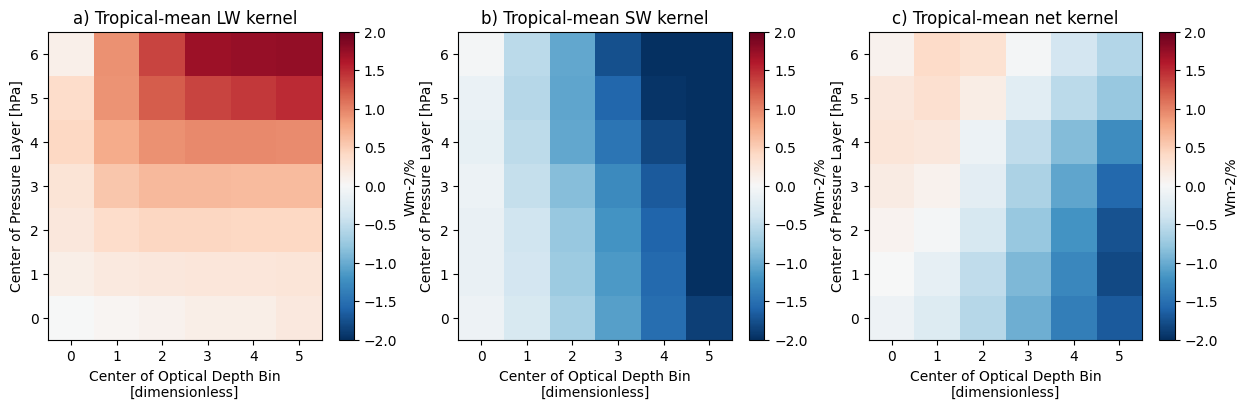

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwK_trop.sel(time=ragutime).mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW kernel")
swK_trop.sel(time=ragutime).mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW kernel")
K_trop.sel(time=ragutime).mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net kernel")
#plt.savefig("kernels.png")

In [15]:
#Another way of testing if the kernels values are ok
p = np.array([1000.0 ,  800.0,  680,  560,  440, 310.0,  180,  10])
midpoints = [(p[i] + p[i -1])/2 for i in np.arange(len(p)) ]
midpoints

[505.0, 900.0, 740.0, 620.0, 500.0, 375.0, 245.0, 95.0]

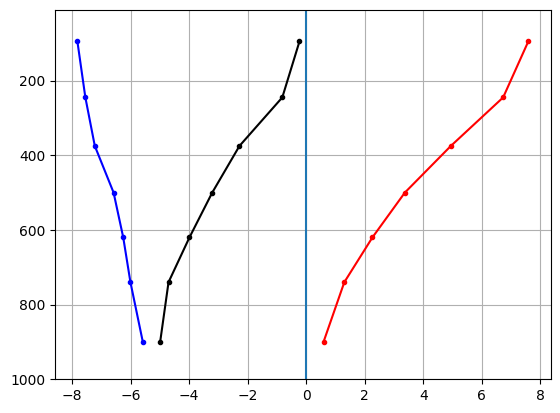

In [17]:

plt.plot(lwK_trop.sel(time=ragutime).mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-r")
plt.plot(swK_trop.sel(time=ragutime).mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-b")
plt.plot(K_trop.sel(time=ragutime).mean(["lat","time"]).sum("opt"), midpoints[1:], ".-k")
plt.gca().invert_yaxis()
plt.ylim(1000,10)
plt.vlines(0, ymin=1000, ymax=10)
plt.grid()

In [18]:
#2
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')

In [19]:
#3
lwR_trop = lwK_trop*cc_trop_anom
swR_trop = swK_trop*cc_trop_anom

In [20]:
#4
lwR_trop_mean = lwR_trop.mean(['lat'])
swR_trop_mean = swR_trop.mean(['lat'])

In [55]:
#5
#Gistemp GMST anomalies
gmst = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])

gmst = gmst.loc[ gmst['Year'] >= 2006 ]
gmst = gmst.loc[ gmst['Year'] < 2021 ]
lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].loc[123:143].values.flatten().tolist()
#lista_gmst, len(lista_gmst)
lista_gmst[5:]
#NOT the same as meaqning across all the values, which gives:0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227... 
gmst_anom_raghu = np.array(lista_gmst[5:], dtype=np.float16)
gmst_anom_raghu

array([0.66, 0.54, 0.7 , 0.66, 0.7 , 0.74, 0.79, 1.01, 0.7 , 0.71, 0.76,
       0.68, 0.61, 0.59, 0.6 , 0.6 , 0.58, 0.58, 0.49, 0.3 , 0.38, 0.75,
       0.54, 0.5 , 0.49, 0.6 , 0.46, 0.61, 0.67, 0.68, 0.54, 0.65, 0.52,
       0.53, 0.61, 0.65, 0.64, 0.74, 0.69, 0.71, 0.65, 0.79, 0.67, 0.75,
       0.83, 0.92, 0.85, 0.75, 0.68, 0.63, 0.67, 0.64, 0.71, 0.81, 0.45,
       0.52, 0.48, 0.65, 0.64, 0.53, 0.62, 0.7 , 0.75, 0.56, 0.66, 0.59,
       0.6 , 0.47, 0.49, 0.57, 0.73, 0.78, 0.64, 0.58, 0.66, 0.72, 0.8 ,
       0.78, 0.53, 0.71, 0.62, 0.67, 0.53, 0.6 , 0.69, 0.6 , 0.7 , 0.76,
       0.69, 0.83, 0.7 , 0.76, 0.55, 0.78, 0.8 , 0.86, 0.67, 0.58, 0.83,
       0.87, 0.8 , 0.67, 0.78, 0.87, 0.9 , 0.96, 0.75, 0.79, 0.81, 0.73,
       0.79, 0.84, 1.08, 1.06, 1.17, 1.18, 1.37, 1.35, 1.09, 0.95, 0.81,
       0.84, 1.02, 0.9 , 0.88, 0.91, 0.86, 1.02, 1.13, 1.16, 0.94, 0.91,
       0.71, 0.81, 0.87, 0.75, 0.89, 0.88, 0.93, 0.82, 0.85, 0.88, 0.88,
       0.81, 0.76, 0.83, 0.78, 0.8 , 1.01, 0.83, 0.

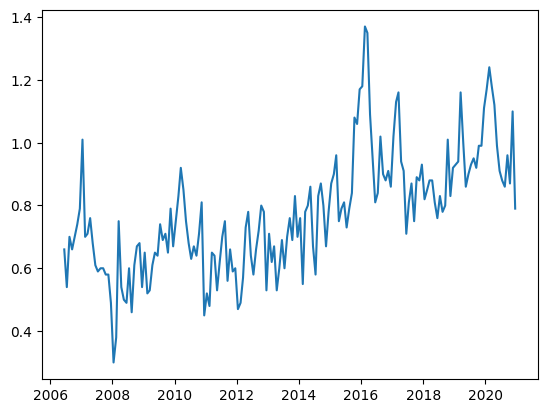

In [57]:
plt.plot(alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).time, gmst_anom_raghu ) #The GMST anomalies 

In [34]:
#6
lw_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bint = lwR_trop_mean.sel(press=p, opt=od)
        regress = stats.linregress(gmst_anom_raghu, bint).slope
        lw_feed[p, od] = regress

lwfeed_trops = xa.DataArray(lw_feed, 
                    coords={"press": lwR_trop_mean.press, "opt":lwR_trop_mean.opt, 
                           },
                   )

Tropical LW feedback =  -0.6971724795300136
High cloud Tropical LW feedback =  -0.5461017679019302
Low-mid cloud Tropical LW feedback =  -0.15107071162808328


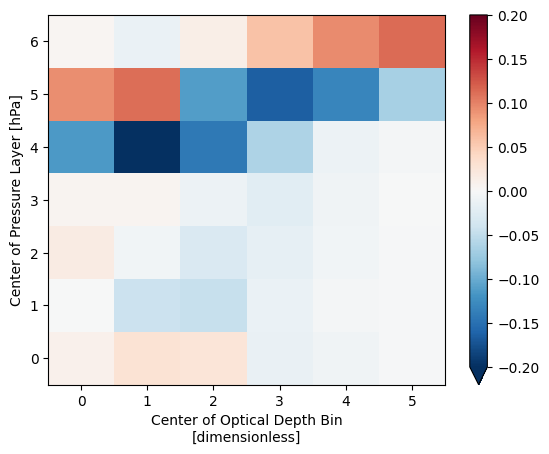

In [49]:
print("Tropical LW feedback = ", lwfeed_trops.sum(["press", "opt"]).data)
print("High cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
lwfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

In [37]:
#6
swR_trop = swK_trop*cc_trop_anom
swR_trop_mean = swR_trop.mean(['lat'])
sw_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_trop_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints).slope
        sw_feed[p, od] = sw_regress

swfeed_trops = xa.DataArray(sw_feed, 
                    coords={"press": swR_trop_mean.press, "opt":swR_trop_mean.opt, 
                           },
                   )

0.931253424532544
High cloud Tropical SW feedback =  0.6079992295722365
Low-mid cloud Tropical SW feedback =  0.32325419496030755


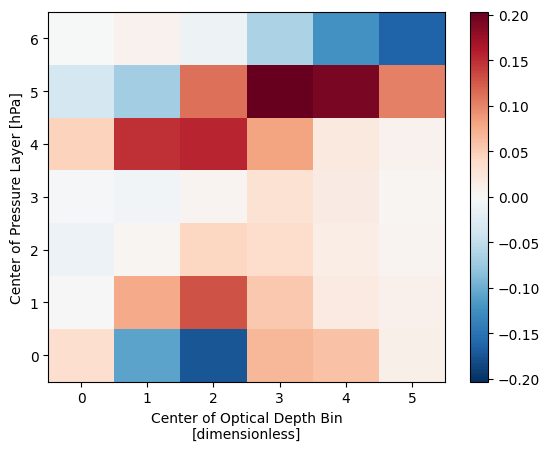

In [50]:
print(swfeed_trops.sum(["press", "opt"]).data)
print("High cloud Tropical SW feedback = ", swfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical SW feedback = ", swfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(swfeed_trops).plot()

<xarray.DataArray ()>
array(0.23408095)
High cloud Tropical net feedback =  0.061897461670306284
Low-mid cloud Tropical net feedback =  0.17218348333222422


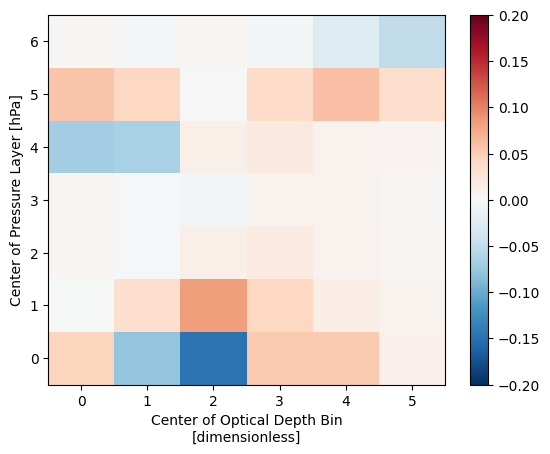

In [51]:
netfeed_trops = swfeed_trops + lwfeed_trops
print(netfeed_trops.sum(["press", "opt"]))
print("High cloud Tropical net feedback = ", netfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical net feedback = ", netfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
netfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

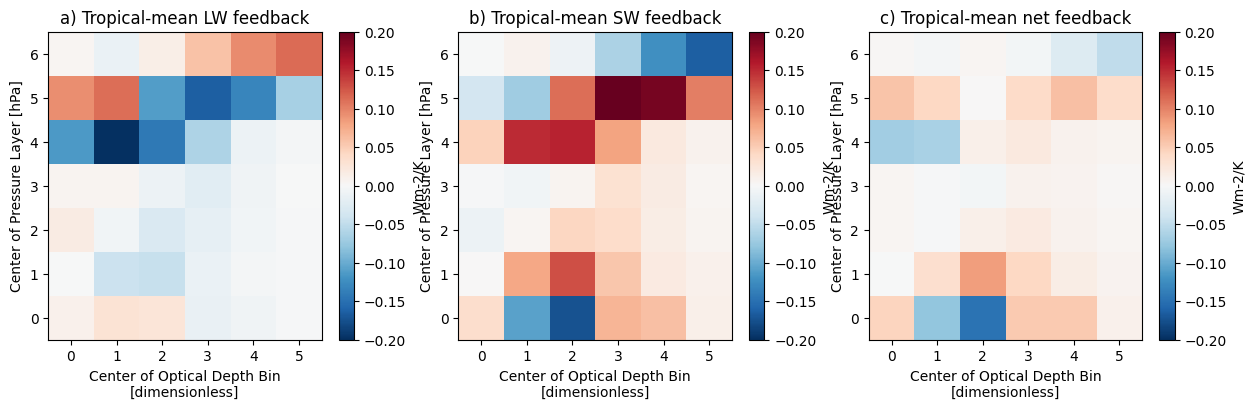

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW feedback")
swfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW feedback")
netfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net feedback")
plt.savefig("feedbacks.png")